In [6]:
import h5py
import numpy as np
import scipy.signal as scis
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
def load_data(path='mnist.h5'):
    with h5py.File(path, 'r') as handle:
        return np.array(handle['data']), np.array(handle['labels'])
    
data, labels = load_data()

In [59]:
gauss_filter = scis.convolve2d(data[0], np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]), mode='same')

laplacian_filter = scis.convolve2d(data[0], np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
]), mode='same')

high_pass_filter = scis.convolve2d(data[0], np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
]), mode='same')

sharpen = scis.convolve2d(data[0], np.array([
    [-0.5, -0.5, -0.5],
    [-0.5,  8.5, -0.5],
    [-0.5, -0.5, -0.5]
]), mode='same')

sobel_x = scis.convolve2d(data[0], np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]), mode='same')

sobel_y = scis.convolve2d(data[0], np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1,]
]), mode='same')

sobel = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

emboss_filter = scis.convolve2d(data[0], np.array([
    [-2, -1,  0],
    [-1,  0,  1],
    [ 0,  1,  2,]
]), mode='same')

In [62]:
gauss_filter_5x5 = scis.convolve2d(data[0], np.array([
    [1,  4,  7,  2,  1],
    [4, 16, 26, 16,  4],
    [7, 26, 41, 26,  7],
    [4, 16, 26, 16,  4],
    [1,  4,  7,  4,  1],
]), mode='same')

laplacian_filter_5x5 = scis.convolve2d(data[0], np.array([
    [0, 0,   1, 0, 0],
    [0, 1,   2, 1, 0],
    [1, 2, -16, 2, 1],
    [0, 1,   2, 1, 0],
    [0, 0,   1, 0, 0]
]), mode='same')

high_pass_filter_5x5 = scis.convolve2d(data[0], np.array([
    [ 0, -1, -1, -1,  0],
    [-1,  2, -4,  2, -1],
    [-1, -4, 13, -4, -1],
    [-1,  2, -4,  2, -1],
    [ 0, -1, -1, -1,  0]
]), mode='same')

sharpen_5x5 = scis.convolve2d(data[0], np.array([
    [-0.5, -0.5,  -0.5, -0.5, -0.5],
    [-0.5, -0.5,  -0.5, -0.5, -0.5],
    [-0.5, -0.5,  24.5, -0.5, -0.5],
    [-0.5, -0.5,  -0.5, -0.5, -0.5],
    [-0.5, -0.5,  -0.5, -0.5, -0.5],
]), mode='same')

sobel_x_5x5 = scis.convolve2d(data[0], np.array([
    [2, 1, 0, -1, -2],
    [2, 1, 0, -1, -2],
    [4, 2, 0, -2, -4],
    [2, 1, 0, -1, -2],
    [2, 1, 0, -1, -2]
]), mode='same')

sobel_y_5x5 = scis.convolve2d(data[0], np.array([
    [ 1,  1,  4,  1,  1],
    [ 1,  1,  2,  1,  1],
    [ 0,  0,  0,  0,  0],
    [-1, -1, -2, -1, -1],
    [-1, -1, -4, -1, -1],
]), mode='same')

sobel_5x5 = np.sqrt(sobel_x_5x5 ** 2 + sobel_y_5x5 ** 2)

emboss_filter_5x5 = scis.convolve2d(data[0], np.array([
    [-4, -3, -2, -1, 0],
    [-3, -2, -1,  0, 1],
    [-2, -1,  0,  1, 2],
    [-1,  0,  1,  2, 3],
    [ 0,  1,  2,  3, 4],
]), mode='same')

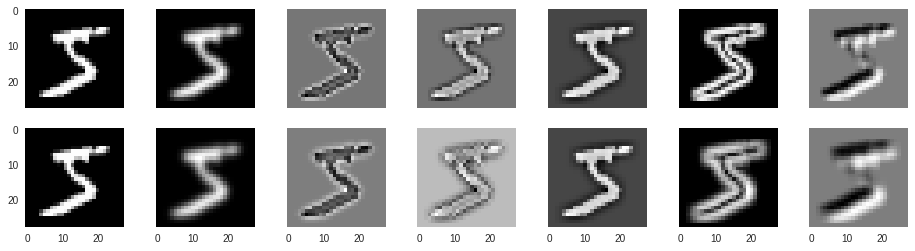

In [65]:
def show_examples(data):
    index = 0
    height = 2
    width = data.shape[0] // height
    figure, axes = plt.subplots(height, width, figsize=(16, 4), sharex=True, sharey=True)
    
    for h in range(height):
        for w in range(width):
            axis = axes[h][w]
            axis.grid(False)
            axis.imshow(data[index], cmap='gist_gray')
            index += 1
    plt.show()

show_examples(np.stack([
    data[0], gauss_filter,     laplacian_filter,     high_pass_filter,     sharpen,     sobel,     emboss_filter,
    data[0], gauss_filter_5x5, laplacian_filter_5x5, high_pass_filter_5x5, sharpen_5x5, sobel_5x5, emboss_filter_5x5,
]))